## Example: Elastic Demand Equilibrium


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Assume one highway link connecting 2 cities (origin and destination).
* Link performance function: $t=10+0.01x$ (1)
* Demand function: $x=5000-100t$ (2)

Solve the problem via (a) observation, (b) inverse demand function, (c) excess demand function.

(a) problem solution via observation: At equilibrium solve the system of equations (1), (2) and obtain **$x^*=2000$ vehicles per hour** and **$t^*=30$ minutes**

(b) leverage inverse demand function, by solving for t from (2): $D^{-1}=50-0.01x$

Formulate the problem leveraging the inverse demand function: $\min{Z}=\int_0^x(10+0.01w)dw-\int_0^x(50-0.01w)dw$

In [2]:
def Z(x):
    return 10 * x + 0.005* x**2 - 50 * x + 0.005 * x**2

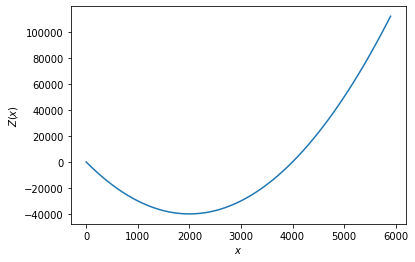

In [7]:
x = np.arange(0, 6000, 100)
plt.plot(x, Z(x)) 
plt.xlabel('$x$')
plt.ylabel('$Z(x)$')
plt.show()

In [4]:
result = minimize(Z, x0=0)
result.message

'Optimization terminated successfully.'

In [5]:
result.x # print the optimal link flow

array([2000.00969994])

In [6]:
result.fun # print the Z function optimal outcome

-39999.99999905911

Optimal solution: $x^*=2000$ vehicles per hour

(c) leverage the excess demand function: Before diving into that we need to assume an upper bound of demand $\bar x$

We will follow the process described in **pre-lecture12 in page 23** where the upper bound $\bar x$ is set equal to the minimal free flow travel time when flow equals 0. Thus, for $x=0$ from (1) $t=10$ minutes, and from (2) $\bar x=4000$.

The excess demand in that case is $e=\bar x- x$ or $e=4000-x$. The excess-demand function is $t=50-0.01(4000-e)=0.01e+10$ The minimization problem in this case can be written as follows.

Formulate the problem leveraging the excess-demand function: $\min{Z}=\int_0^x(10+0.01w)dw+\int_0^e(0.01v+10)dv$

In [8]:
def Z2(vars):
    x, e = vars
    return 10 * x + 0.005* x**2 + 10 * e + 0.005 * e**2

def constraint(vars):
    x, e = vars
    return x + e - 4000

x_bounds = (0, None)
e_bounds = (0, None)
initial_guess = [0,4000]
res = minimize(Z2, initial_guess, constraints={"fun": constraint, "type": "eq"}, bounds=[x_bounds, e_bounds])
if res.success:
    opt_vars = res.x
    print(opt_vars)
else:
    raise ValueError(res.message)

[2000.00497577 1999.99502423]


Optimal solution: $x^*=2000$ vehicles per hour and $e^*=2000$ since $e=4000-x$.

We could assume that $\bar x=5000$ vehicles per hour with excess demand as  $e=5000-x$. The excess-demand function is $t=50-0.01(5000-e)=0.01e$ The minimization problem in this case can be written as follows.

Formulate the problem leveraging the excess-demand function: $\min{Z}=\int_0^x(10+0.01w)dw+\int_0^e(0.01v)dv$

In [10]:
def Z3(vars):
    x, e = vars
    return 10 * x + 0.005* x**2 + 0.005 * e**2 

def constraint(vars):
    x, e = vars
    return x + e - 5000

x_bounds = (0, None)
e_bounds = (0, None)
initial_guess = [0,5000]
res3 = minimize(Z3, initial_guess, constraints={"fun": constraint, "type": "eq"}, bounds=[x_bounds, e_bounds])
if res.success:
    opt_vars = res3.x
    print(opt_vars)
else:
    raise ValueError(res3.message)

[1999.95605595 3000.04394405]


Optimal solution: $x^*=2000$ vehicles per hour and $e^*=3000$ since $e=5000-x$.